**MNIST hand Written Digit Recognition:**

<b> A notebook for the classification of the MNIST hand written digits [0-9] dataset.

I used Sequential Convolutional Neural Networks (CNN) model using Keras and tensorflow as a backend.



Result : |Training Accuracy | Dev(Validation) Accuracy| Testing Accuracy |
---------------------------------------------------------------------|
         | 99.45 %          | 99.14 %             | 99.31 %          |
----------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import tensorflow as tf

In [5]:
batch_size     = 32
nb_classes     = 10
nb_ephochs     = 50
img_rows, img_cols = 28,28
nb_filters     = 32
pool_size      = 2
kernel_size    = 3

In [6]:
if K.image_dim_ordering() == 'th':
    input_shape = (1,img_rows, img_cols)
else:
    input_shape = (img_rows,img_cols,1)

In [31]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [32]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [33]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [34]:
y_train[0], y_test[0]

(5, 7)

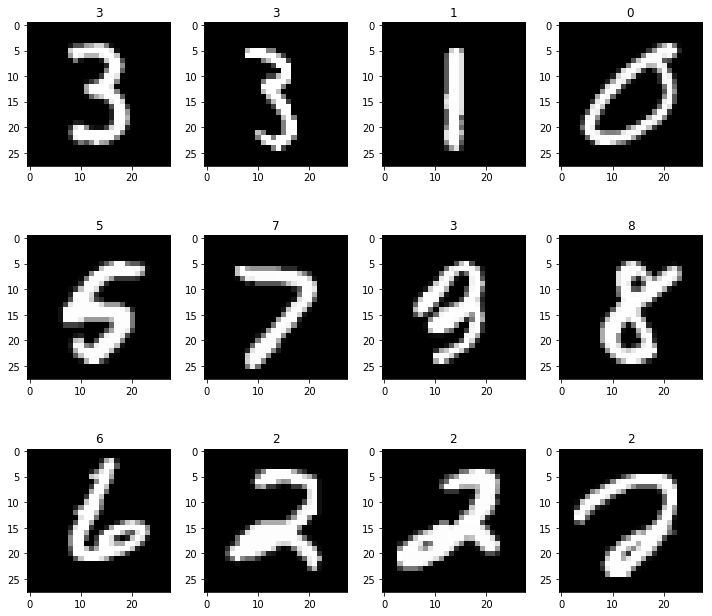

In [20]:
fig, axes = plt.subplots(3, 4,figsize=(10,10))
for row in axes:
    for axe in row:
        index = np.random.randint(10000)
        img = X_train[index].reshape((28, 28))
        obj = X_train[index]
        axe.imshow(img, cmap='gray')
        axe.set_title(y_train[index])
        plt.tight_layout()

In [35]:
X = X_train
y = y_train
y = to_categorical(y)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)

In [38]:
X_test = X_test
y_test = y_test
y_test  = to_categorical(y_test)

In [39]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(48000, 28, 28)
(12000, 28, 28)
(10000, 28, 28)


In [40]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)


X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train  / 255
X_val   = X_val   / 255
X_test  = X_test / 255

In [41]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)


In [44]:
X_train.max(),X_val.max(), X_test.max()

(1.0, 1.0, 1.0)

In [45]:
X_train.min(),X_val.min(), X_test.min()

(0.0, 0.0, 0.0)

In [46]:
model = Sequential()
model.add(Convolution2D(filters= nb_filters,kernel_size=(kernel_size,kernel_size),input_shape = input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(pool_size,pool_size)))

model.add(Convolution2D(filters=nb_filters, kernel_size=(kernel_size,kernel_size),activation='relu'))
model.add(MaxPooling2D(pool_size=(pool_size,pool_size)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(output_dim = 128 , activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(output_dim = nb_classes, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


C:\Users\gebabe\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\gebabe\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  del sys.path[0]


In [47]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               102528    
__________

In [48]:
import time
start_time = time.time()

training_history =model.fit(X_train,y_train,batch_size= batch_size, epochs = nb_ephochs, verbose=1, validation_data=(X_val, y_val))

training_time = time.time() - start_time
print(training_time)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 43s - loss: 0.2784 - acc: 0.9129 - val_loss: 0.0712 - val_acc: 0.9785
Epoch 2/50
48000/48000 [==============================] - 48s - loss: 0.1034 - acc: 0.9688 - val_loss: 0.0539 - val_acc: 0.9841
Epoch 3/50
48000/48000 [==============================] - 47s - loss: 0.0817 - acc: 0.9752 - val_loss: 0.0486 - val_acc: 0.9852
Epoch 4/50
48000/48000 [==============================] - 47s - loss: 0.0718 - acc: 0.9783 - val_loss: 0.0430 - val_acc: 0.9860
Epoch 5/50
48000/48000 [==============================] - 42s - loss: 0.0593 - acc: 0.9817 - val_loss: 0.0335 - val_acc: 0.9885
Epoch 6/50
48000/48000 [==============================] - 40s - loss: 0.0546 - acc: 0.9830 - val_loss: 0.0357 - val_acc: 0.9898
Epoch 7/50
48000/48000 [==============================] - 42s - loss: 0.0496 - acc: 0.9848 - val_loss: 0.0433 - val_acc: 0.9888
Epoch 8/50
48000/48000 [==============================

In [49]:
training_history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [50]:
training_accuracy   = training_history.history['acc']
validation_accuracy = training_history.history['val_acc']

training_loss       = training_history.history['loss']
validation_loss     = training_history.history['val_loss']


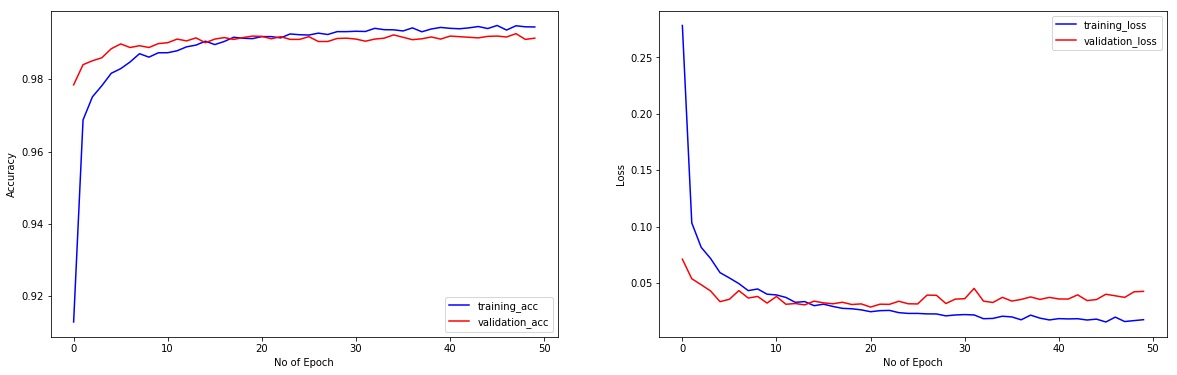

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,6))

axes[0].plot(training_accuracy,'b')
axes[0].plot(validation_accuracy,'r')
axes[0].legend(['training_acc', 'validation_acc'])
axes[0].set_xlabel('No of Epoch')
axes[0].set_ylabel('Accuracy')

axes[1].plot(training_loss,'b')
axes[1].plot(validation_loss,'r')
axes[1].legend(['training_loss', 'validation_loss'])
axes[1].set_xlabel('No of Epoch')
axes[1].set_ylabel('Loss')

# Model Evaluation

In [52]:
score = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 3s     


In [53]:
print('Test loss: {}  \n Test Accuracy: {} %'.format(score[0],score[1]*100))

Test loss: 0.030832250112847306  
 Test Accuracy: 99.31 %
